Fatima Abdoun, Serena Bou Chaaya, Valentine Wien, Victoire Ollari 

In [5]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Cost functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

* Each **row** of X corresponds to **one data point (observation, sample)**.
* That is, row i contains the feature values of the i-th example.
* If there are n samples, X will have n rows.

#### 1.2 What are the columns of $\mathbf{X}$?

* Each column of X corresponds to one feature/variable across all data points.
* That is, column j contains the values of the j-th feature for every observation.
* If there are m features, X will have m columns.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)?

We start from:

$$
y \approx X w_1 + w_0
$$


To rewrite this in the compact form

$$
y \approx \tilde{X} W
$$

we **augment $X$** with an additional column of ones.

That is:

$$
\tilde{X} =
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,d}
\end{bmatrix}
$$

and

$$
W =
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_d
\end{bmatrix}
$$
This can be proved : 
We start with the augmented forms:

$$
\tilde{X} = \begin{bmatrix} \mathbf{1} & X \end{bmatrix}, 
\qquad
W = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix},
$$

where  
- $\mathbf{1} \in \mathbb{R}^{n \times 1}$ is a column of ones,  
- $X \in \mathbb{R}^{n \times d}$ is the feature matrix,  
- $w_0 \in \mathbb{R}$ is the scalar bias,  
- $w_1 \in \mathbb{R}^{d \times 1}$ is the weight vector.  


***Matrix multiplication***:

$$
\tilde{X} W 
= 
\begin{bmatrix} \mathbf{1} & X \end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}
= \mathbf{1} w_0 + X w_1
$$



***Interpretation***:

- $\mathbf{1} w_0 = w_0 \mathbf{1}$ is just an $n$-vector with every entry equal to $w_0$.  
- So:

$$
\tilde{X} W = X w_1 + w_0 \mathbf{1}.
$$


***Component-wise (for sample $i$)***:

$$
(\tilde{X} W)_i = w_0 \cdot 1 + \sum_{j=1}^{d} x_{ij} w_{1,j}
= w_0 + (X w_1)_i
$$

This is exactly the original expression:

$$
X w_1 + w_0.
$$

- Original $X$:
  - Shape: $(n \times d)$  
  - $n =$ number of samples (rows)  
  - $d =$ number of features (columns)  

- Augmented $\tilde{X}$:
  - Shape: $(n \times (d+1))$  
  - Same number of rows (still one per sample).  
  - One extra column (the bias column of ones).  

- Weight vector $W$:
  - Shape: $((d+1) \times 1)$, holding both intercept $w_0$ and feature weights.  

- $\tilde{X}$ is the original design matrix $X$ **with an extra first column of ones**.  
- Its shape changes from $(n \times d)$ to $(n \times (d+1))$.  


For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.4 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$

In [6]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector**2)
    return mean_squared_error

In [7]:
mean_squared_error(np.array([0,0,0]))

0.0

In [8]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error

In [9]:
mean_absolute_error([1,1,1])

1.0

Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.5 What is the shape of these cost functions as a function of the error

In [10]:
x_axis = np.linspace(-10,10,100) 
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

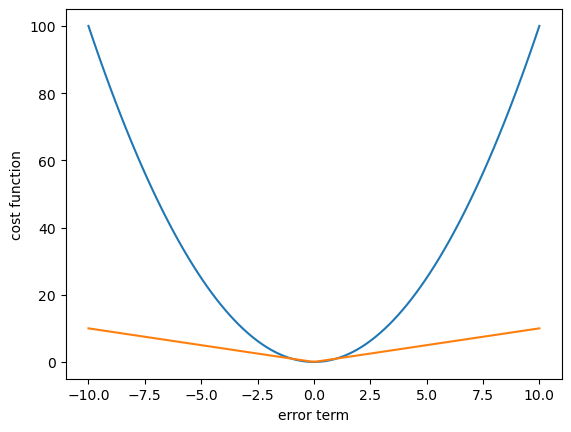

In [11]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

***Cost Functions in Linear Regression***

In linear regression, we use a *cost function* to measure how far the model’s predictions are from the true values. Two common choices are the *Mean Squared Error (MSE)* and the *Mean Absolute Error (MAE)*.

The plot above shows the cost functions evaluated on a range of possible error values from (-10) to (10):

* *Blue curve = MSE ($x^2$)*
* *Orange curve = MAE ($|x|$)*

***Interpretation of the curves***

* **Blue curve (MSE):**

  * A parabola opening upwards.
  * Cost increases *quadratically* as the error grows.
  * This means *large errors are penalized much more heavily* than small errors.

* **Orange curve (MAE):**

  * A straight “V”-shaped line.
  * Cost increases *linearly* with the error.
  * This means *all errors are treated proportionally*, making MAE more robust to outliers.

***Summary***

* The *blue parabola* represents the *Mean Squared Error (MSE)*.
* The *orange V-shape* represents the *Mean Absolute Error (MAE)*.
* MSE punishes large errors more severely, while MAE gives a fairer weight to all errors.



#### 1.6  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? What implications does this have for gradient based optimization like gradient descent?

***Differentiability of the two losses***

* *MSE (Mean Squared Error):*

$$
\text{MSE}(\epsilon) = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2
$$

* Differentiable everywhere (smooth parabola).
* Derivative:
  $$
  \frac{\partial \text{MSE}}{\partial \epsilon_i} = \frac{2}{N}\epsilon_i
  $$

This makes MSE very friendly for gradient-based optimization methods.

* *MAE (Mean Absolute Error):*

$$
\text{MAE}(\epsilon) = \frac{1}{N}\sum_{i=1}^N |\epsilon_i|
$$

* Differentiable everywhere *except at** $\epsilon_i = 0$ (the “corner” of the V).
* Gradient:

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} = \frac{1}{N}, \quad \epsilon_i > 0
$$

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} = -\frac{1}{N}, \quad \epsilon_i < 0
$$

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} \text{ is undefined } , \quad \epsilon_i = 0
$$


⚠️ At $\epsilon_i = 0$, the gradient is not defined. 

***1. Optimization in machine learning***

When we train a model (like linear regression or neural networks), we want to find the *best parameters* (weights (w)) that minimize a *loss function* (e.g., MSE, MAE).

* Optimization = process of finding the minimum of the loss function.
* The “landscape” of the loss function can be visualized like a surface or curve.

***2. What is the **gradient**?***

* The *gradient* is a vector of partial derivatives of the loss function with respect to the parameters.
* Intuitively: it points in the direction of *steepest increase*.
* If we want to minimize, we go in the *opposite direction* of the gradient.


***3. Why gradients matter***

* If the loss is smooth (like **MSE**), gradients are well-defined everywhere → optimization is straightforward.
* If the loss has corners (like **MAE**), gradients may not exist everywhere → we use *subgradients*, and optimization may be slower or trickier.

* **MSE:**

  * Smooth and differentiable → gradient descent has a clear direction everywhere.
  * Leads to stable and efficient optimization.

* **MAE:**

  * Non-differentiable at $\epsilon = 0$.
  * Gradient descent still works, but requires **subgradient methods** or special handling.
  * Convergence can be slower or less stable.

* **MSE is differentiable everywhere**, so gradient descent works smoothly.
* **MAE is not differentiable at zero**, which complicates gradient-based optimization.
  In practice, optimizers can still handle this using subgradients, but training may be less stable and slower compared to MSE.

#### 1. Which loss function is more sensitive to outliers and why?

1. **MSE squares the error terms**:
   $$
   \text{MSE} = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2
   $$

   * If one data point has a very large error (an outlier), squaring it makes it disproportionately larger than the rest.
   * Example:

     * Normal error = 2 → squared = 4
     * Outlier error = 20 → squared = 400 
   * That one outlier can dominate the cost.

2. **MAE grows linearly with error**:
   $$
   \text{MAE} = \frac{1}{N}\sum_{i=1}^N |\epsilon_i|
   $$

   * Outliers only contribute proportionally to their magnitude.
   * So the influence of a large error is not exaggerated compared to small errors.

***Summary***

* **MSE** → **more sensitive** to outliers, because squaring amplifies large errors.
* **MAE** → more **robust** to outliers, since it treats all errors linearly.


# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution

The system
$$
\mathbf{X}\mathbf{w} = \mathbf{y}
$$
has **one unique solution** when:

* $(\mathbf{X})$ is a **square matrix** ((n = d)), and
* its columns are linearly independent → (\det(\mathbf{X}) \neq 0).

In that case,
$$
\mathbf{w} = \mathbf{X}^{-1}\mathbf{y}
$$

Geometrically:

Each equation is a line/plane. All of them intersect at exactly one point.
Example in 2D: two non-parallel lines crossing at one point.
Therefore in 2D when two lines cross at a single point → one solution

#### 2.2 No solution

The system has **no solution** when it is **overdetermined** (n > d), more equations than unknowns and $(\mathbf{y})$ does not lie in the column space of $(\mathbf{X})$.

* In regression, this is the usual case → we use **least squares** instead of exact solution.

Geometrically : 

Equations are inconsistent — they “miss” each other.
Example in 2D: two parallel lines with different intercepts → they never meet.
In higher dimensions: planes that don’t intersect at a common point.
Thereofore in 2D for example parallel lines (no intersection) → no solution

#### 2.3 An infinite number of solutions

The system has **infinitely many solutions** when it is **underdetermined** n < d, more unknowns than equations.

* With linearly independent columns, any $(\mathbf{y})$ in the column space can be matched by infinitely many $(\mathbf{w})$.
* This happens because there are “free variables” in the solution.

Geometrically : 

More unknowns than equations → we have “free variables.”
Example in 2D: one line equation describes infinitely many solutions along that line.
Example in 3D: two planes intersect in a line → infinitely many points on that line.
Therefore in 2D 2 lines that overlap completely → infinitely many solutions


#### 2.4 Give a geometrical interpretation of the matrix Rank (10 bonus point if you use the Manim package)


***1. Rank as “dimension of the span”***

* Each column of a matrix can be seen as a **vector** in space.
* The **rank** tells us the **dimension of the space spanned** by those vectors (i.e., how many independent directions they cover).


**Rank 1 (line)**

All columns lie on the same line.

Example in 2D:
$$
\begin{bmatrix}
1 & 2 \\
2 & 4
\end{bmatrix}
$$

Both columns point in the same direction → they span only a **1D line** through the origin.


**Rank 2 (plane in 3D, or full 2D space)**

Columns span an entire **plane** (in 3D) or the whole **2D plane**.

Example in 2D:
$$
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

These two vectors (the unit axes) span all of $(\mathbb{R}^2)$.

**Rank 3 (space)**

In 3D, if you have 3 independent columns, they span the whole **3D space**.

Example:
$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
The three standard basis vectors span all of $(\mathbb{R}^3)$.


***2. Visual intuition***

* **Rank = 1** → all vectors are collinear (span = a line).
* **Rank = 2** → vectors are not collinear, but lie in a plane.
* **Rank = 3** → vectors point in 3 independent directions (they fill 3D space).
* In general, **rank = dimension of the “flat” (line, plane, hyperplane, …) spanned by the columns**.

#### 2.5 In general, why can't we solve the linear equation using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

In regression we have

$$
\mathbf{y} = \tilde{\mathbf{X}} \mathbf{w}
$$

and we’d like to “solve for” (\mathbf{w}).
Naively, one might think:

$$
\mathbf{w} = \tilde{\mathbf{X}}^{-1} \mathbf{y}
$$

But this is **not generally possible**.

1. **$\tilde{\mathbf{X}}$ is not square in general**

* $\tilde{\mathbf{X}} \in \mathbb{R}^{n \times (d+1)}$
* Usually, (n) (number of data points) is **much larger** than (d) (number of features).
* That makes $\tilde{\mathbf{X}}$ a **tall rectangular matrix**, which cannot be inverted.
* Only square full-rank matrices have a true inverse.

2. **Even if square, may not be invertible**

* If the columns are linearly dependent (not full rank), $\det(\tilde{\mathbf{X}})=0$.
* Then $\tilde{\mathbf{X}}^{-1}$ does not exist.


3. **In practice, the system may not have an exact solution**

* Often $\mathbf{y}$ does not lie exactly in the column space of $\tilde{\mathbf{X}}$.
* So $\tilde{\mathbf{X}}\mathbf{w} = \mathbf{y}$ might have **no exact solution**.

We cannot solve using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\mathbf{w}$ because $\tilde{\mathbf{X}}$ is usually **not square** (more rows than columns) and thus not invertible. Even when square, it may not be full rank, and in general $\mathbf{y}$ may not lie in the column space of $\tilde{\mathbf{X}}$.



#### 2.6 Differentiate above formula step by step and show what will we have?

First we develop the least squares expression : 


$$
(y - \bar{X} w)^T (y - \bar{X} w)
$$

$$
= (y^T - w^T \bar{X}^T)(y - \bar{X} w)
$$

$$
= y^T y - y^T \bar{X} w - w^T \bar{X}^T y + w^T \bar{X}^T \bar{X} w
$$

But we know that $\bar{X}$ is a matrix, so multiplied by a vector this yields a vector. A vector multiplied by a vector of transposed dimensions yields a scalar. 
Fruther more we know that for a scalar this expression is valid : $c = c^T = c$ 

So we apply a transposed on the scalar resulting in the simplification of the expression : 

$$
y^T y - w^T \bar{X}^T y - y^T \bar{X} w + w^T \bar{X}^T \bar{X} w
$$

$$
= y^T y - 2 w^T \bar{X}^T y + w^T \bar{X}^T \bar{X} w
$$



Now, we compute the derivative with respect to $w$:

First it can be seen that $y^T y$ so it's derivative accoridng to w is automatically nul. 

$$
\frac{\partial}{\partial w} \left( -2 w^T \bar{X}^T y + w^T \bar{X}^T \bar{X} w \right)
$$

We distribute the derivative across all parentheses; 

$$
= -2 \frac{\partial}{\partial w}(w^T \bar{X}^T y) + \frac{\partial}{\partial w}(w^T \bar{X}^T \bar{X} w)
$$

$-2 \bar{X}^T y$ is independent of w so this can be taken out of the derivative. Furthermore, the derivative of w transpose as a function  of w is simply an all-ones vector. This yields the following expression : 

$$
= -2 \bar{X}^T y + \frac{\partial}{\partial w}(w^T A w)
$$

where $A = \bar{X}^T \bar{X}$ is a symmetric matrix.

$$
\frac{\partial}{\partial w}(w^T A w) = 2 A w
$$

Thus the derivative of the least squares expression yields:

$$
-2 \bar{x}^T y + 2 A w
$$

This can be proven : 


For example with a 2 by 2 A matrix and a 2 by 1: (This can after be generalized for bigger matrices by expressing the matrices uner the form of sums)
$$
w = 
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix},
\quad
A = 
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}
$$

Then

$$
w^T A w =
\begin{pmatrix} w_1 & w_2 \end{pmatrix}
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
$$

$$
= (w_1 A_{11} + w_2 A_{21}    \; w_1 A_{12} + w_2 A_{22})
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
$$

$$
= w_1 (w_1 A_{11} + w_2 A_{21}) + w_2 (w_1 A_{12} + w_2 A_{22})
$$

$$
= w_1^2 A_{11} + w_1 w_2 A_{21} + w_2 w_1 A_{12} + w_2^2 A_{22}
$$

$$
= A_{11} w_1^2 + (A_{21} + A_{12}) w_1 w_2 + A_{22} w_2^2
$$


Now compute derivatives:

$$
\frac{\partial}{\partial w_1} = 2 w_1 A_{11} + A_{12} w_2 + A_{21} w_2
$$

$$
\frac{\partial}{\partial w_2} = 2 w_2 A_{22} + A_{21} w_1 + A_{12} w_1
$$

So the gradient is:

$$
\nabla = 
\begin{pmatrix}
\frac{\partial}{\partial w_1} \\
\frac{\partial}{\partial w_2}
\end{pmatrix}
=
\begin{pmatrix}
w_2 (A_{21} + A_{12}) + 2 w_1 A_{11} \\
w_1 (A_{12} + A_{21}) + 2 w_2 A_{22}
\end{pmatrix}
$$

And because by definiton of a symmetric matrix we equivalently have $A_21 = A_12$ : 

$$
\nabla = 
\begin{pmatrix}
\frac{\partial}{\partial w_1} \\
\frac{\partial}{\partial w_2}
\end{pmatrix}
=
\begin{pmatrix}
2 w_2 A_{21}  + 2 w_1 A_{11} \\
2 w_1 A_{21} + 2 w_2 A_{22}
\end{pmatrix}
$$

$$
=
2
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
=
2 A w
$$

So at the end we do infact find the following expression for the differentiation of the least squares expression : 
$$
-2 \bar{X}^T y + 2 A w
$$

$$
= -2 \bar{X}^T y + 2 \bar{X}^T \bar{X} w


#### 2.7 if we want $\| y - \tilde{X} w \|_2^2$ to be minimum, what should the derivative be equal to?

Now setting the gradient to zero:

$$
-2 \bar{X}^T y + 2 A w = 0
$$

$$
2 \bar{X}^T y = 2 A w
$$

$$
A w = \bar{X}^T y
$$

$$
w = A^{-1} \bar{X}^T y
$$

But recall $A = \bar{X}^T \bar{X}$, hence:

$$
w = (\bar{X}^T \bar{X})^{-1} \bar{X}^T y
$$



#### 2.8 What is the Hat matrix and what does its diagonal values correspond to?

The **hat matrix** is an important concept in linear regression. It's called the Hat matrix because it "puts a hat" on **y**, transforming the observed values **$y$** into the predicted values **$ŷ$**:

$$
\hat{y} = H y
$$

$$
\boxed{H = X (X^\top X)^{-1} X^\top}
$$

Where:
- X is the matrix of explanatory variables (including the intercept)
- Y is the vector of observed values
- H is the hat matrix
- $\hat{y}$ are the predicted values

---

##### Key Properties

- H is a **square matrix** of size n $×$ n (n = number of observations)
- It depends only on $X$, not on $Y$
- It is **symmetric** $H = H^\top$ and **idempotent** $H^2 = H$
- The **trace** of $H$ equals the number of parameters $p$:

$$
\text{trace}(H) = p
$$

---

##### Diagonal Elements

The diagonal elements $h_{ii}$ are called **leverage values**:

$$
\boxed{h_{ii} = x_i^\top (X^\top X)^{-1} x_i}
$$

- They measure **how much an observation has the potential to influence its own fitted value**.
- $0 \leq h_{ii} \leq 1$.
- The sum of all leverage values equals the number of parameters $p$.
- The **average leverage** is:

$$
\bar{h}_{ii} = \frac{p}{n}
$$

- A large $h_{ii}$ (e.g., $> 2 \times \bar{h}_{ii}$) means the observation has **high leverage** (potential for influence).

---

##### Leverage vs. Influence

**Important distinction:**
- **High leverage** ($h_{ii}$) means an observation has the potential to be influential
- **Actual influence** depends on both leverage AND the residual

An observation with high leverage but a small residual may not actually be very influential. True influence is better measured by metrics like **Cook's distance**, which combines leverage with residuals:

$$
D_i = \frac{e_i^2}{p \cdot MSE} \cdot \frac{h_{ii}}{(1-h_{ii})^2}
$$

---

##### Connection to Residuals

Observations with high leverage have **smaller residual variance**:

$$
\text{Var}(\hat{\epsilon}_i) = \sigma^2(1 - h_{ii})
$$

This means high-leverage points are fitted more closely by the model.

---

##### Simple Linear Regression Example

For a simple regression with one predictor:

$$
h_{ii} = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum (x_j - \bar{x})^2}
$$

- Points far from the mean have high leverage.
- The furthest points from $\bar{x}$ have the most potential to influence the regression line.

---

##### Off-Diagonal Elements

While the diagonal elements are most important, the **off-diagonal elements** $h_{ij}$ also have meaning:
- They measure how observation $j$ influences the fitted value at observation $i$
- Generally less used in practice than diagonal elements

---

##### Why It Matters

- The hat matrix shows how much each observation **potentially influences** its prediction.
- Large diagonal values indicate points with **high leverage** (potential for influence).
- Combined with residual analysis, it's very useful for **regression diagnostics** and **detecting outliers or influential data points**.
- For actual influence assessment, use **Cook's distance** or other influence measures that combine leverage with residuals.

#### 2.9 What is Willson’s plot and how does it help in outlier detection?

__< Your answer >__

#### 2.10 What happens if some columns are linearly dependent? What is the connection to feature selection?

__< Your answer >__

#### 2.11 What will be the new cost function after adding the regularization term?

In ordinary least squares, the cost function to minimize is:

$$
J(w) = \| y - \tilde{X}w \|_2^2 = (y - \tilde{X}w)^T (y - \tilde{X}w)
$$

When we add the regularization term, the new cost function becomes:

$$
\boxed{
J(w) = \| y - \tilde{X}w \|_2^2 + \lambda \| w \|_2^2
}
$$

or equivalently,

$$
J(w) = (y - \tilde{X}w)^T (y - \tilde{X}w) + \lambda w^T w
$$

where:

- $\,\lambda \ge 0\,$ is the **regularization parameter** controlling the penalty strength,  
- $\,\|w\|_2^2 = \sum_{j=1}^{d} w_j^2\,$ penalizes large weight values,  
- The second term prevents overfitting and ensures numerical stability by keeping $\,(\tilde{X}^\top \tilde{X} + \lambda I)\,$ always invertible.




#### 2.12 What will be the new 𝑤 when we differentiate the new cost function and set it to zero.

We start from the regularized cost function:
$$
J(\mathbf{w}) \;=\; \|\,\mathbf{y}-\tilde{X}\mathbf{w}\,\|_2^2 \;+\; \lambda \|\mathbf{w}\|_2^2
\;=\; (\mathbf{y}-\tilde{X}\mathbf{w})^\top(\mathbf{y}-\tilde{X}\mathbf{w}) \;+\; \lambda \,\mathbf{w}^\top\mathbf{w}.
$$

**1) Expand the quadratic form**
$$
\begin{aligned}
J(\mathbf{w})
&= \mathbf{y}^\top\mathbf{y} \;-\; 2\,\mathbf{w}^\top \tilde{X}^\top \mathbf{y}
\;+\; \mathbf{w}^\top \tilde{X}^\top \tilde{X}\,\mathbf{w}
\;+\; \lambda\, \mathbf{w}^\top\mathbf{w}.
\end{aligned}
$$

**2) Take the gradient w.r.t. $\mathbf{w}$** (using $\nabla_{\mathbf{w}}(\mathbf{w}^\top A \mathbf{w})=(A+A^\top)\mathbf{w}$ and $\tilde{X}^\top\tilde{X}$ is symmetric):
$$
\nabla_{\mathbf{w}} J(\mathbf{w}) \;=\; -2\,\tilde{X}^\top \mathbf{y}
\;+\; 2\,\tilde{X}^\top \tilde{X}\,\mathbf{w}
\;+\; 2\,\lambda\,\mathbf{w}.
$$

**3) Set the gradient to zero and rearrange**
$$
-2\,\tilde{X}^\top \mathbf{y} + 2\,\tilde{X}^\top \tilde{X}\,\mathbf{w} + 2\,\lambda\,\mathbf{w} \;=\; \mathbf{0}
\;\;\Longrightarrow\;\;
(\tilde{X}^\top \tilde{X} + \lambda I)\,\mathbf{w} \;=\; \tilde{X}^\top \mathbf{y}.
$$

**4) Solve for $\mathbf{w}$** (for $\lambda>0$, the matrix is positive definite and invertible):
$$
\boxed{\;
\mathbf{w}_{\text{ridge}}
\;=\;
(\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\,\tilde{X}^\top \mathbf{y}
\;}
$$


#### 2.13 Prove that the part of Hat matrix where we want to take the inverse from is always reversible after we introduce the regularization term.

**Goal.** Show that after adding regularization term, the matrix we need to invert,
$$(\tilde{X}^\top \tilde{X} + \lambda I),$$
is **invertible** for any $\lambda>0$. Consequently,
$$H_\lambda \;=\; \tilde{X}\,(\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\tilde{X}^\top$$
is well defined.

#### Proof via quadratic form

Take any non-zero vector $\mathbf{v}\in\mathbb{R}^{d+1}$. Consider the quadratic form:
$$
\mathbf{v}^\top(\tilde{X}^\top \tilde{X} + \lambda I)\,\mathbf{v}
\;=\; \underbrace{\mathbf{v}^\top \tilde{X}^\top \tilde{X}\,\mathbf{v}}_{\;=\;\|\tilde{X}\mathbf{v}\|_2^2\;\ge 0}
\;+\;
\underbrace{\lambda\,\mathbf{v}^\top \mathbf{v}}_{\;=\;\lambda\|\mathbf{v}\|_2^2\;>\;0\text{ for }\mathbf{v}\neq 0}.
$$

Hence,
$$
\mathbf{v}^\top(\tilde{X}^\top \tilde{X} + \lambda I)\,\mathbf{v}
= \|\tilde{X}\mathbf{v}\|_2^2 + \lambda\|\mathbf{v}\|_2^2 \;>\; 0
\quad\text{for all } \mathbf{v}\neq 0 \text{ when } \lambda>0.
$$

Therefore $(\tilde{X}^\top \tilde{X} + \lambda I)$ is **symmetric positive definite (SPD)**.  
An SPD matrix has **all positive eigenvalues** and is **invertible**. $\square$


#### Equivalent eigenvalue argument (spectral shift)

Let $\tilde{X}^\top \tilde{X} = Q \Lambda Q^\top$ with $\Lambda=\mathrm{diag}(\sigma_1^2,\ldots,\sigma_{d+1}^2)$, $\sigma_i^2\ge 0$.
Then
$$
\tilde{X}^\top \tilde{X} + \lambda I
= Q(\Lambda+\lambda I)Q^\top,
$$
whose eigenvalues are $(\sigma_i^2+\lambda) \ge \lambda > 0$.  
All eigenvalues are strictly positive $\Rightarrow$ the matrix is invertible. $\square$


#### Conclusion

Because $(\tilde{X}^\top \tilde{X} + \lambda I)$ is invertible for any $\lambda>0$, the solution
$$
\mathbf{w} = (\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\tilde{X}^\top \mathbf{y}
$$
and the associated matrix
$$
H_\lambda = \tilde{X}(\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\tilde{X}^\top
$$
are always well defined. This is the precise sense in which regularization makes “the part we invert” in the Hat matrix *always reversible*.


#### 2.14  What is the shape of the parabola as a function of $a$?

In [12]:
def parabola(x, a = 1): 
    return a * x ** 2

In [13]:
x_axis_parabola = np.linspace(-10, 10, 100)

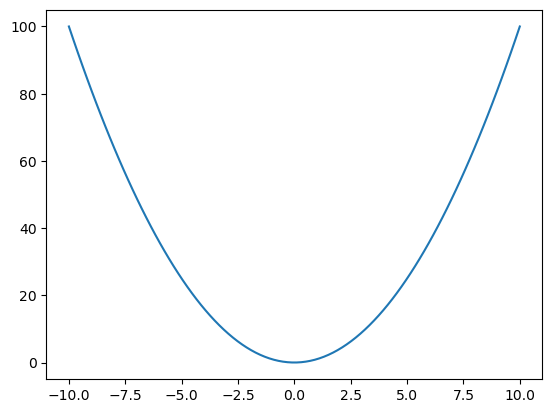

In [14]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

__< Your answer >__

#### 2.15 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [15]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [16]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [17]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

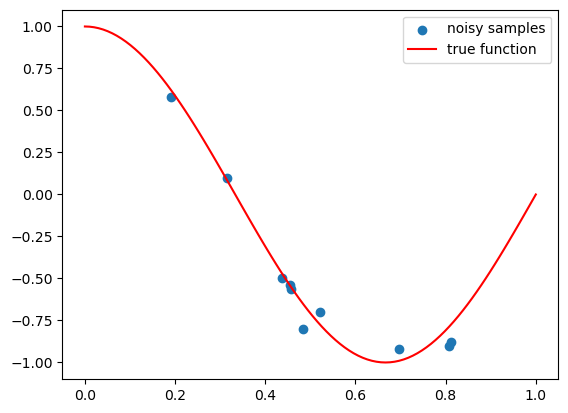

In [18]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

In [20]:
polynomial_features = PolynomialFeatures(degree=1,  # ← change to 2 then 16 and re-run
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

To plot the result, you can use the following code

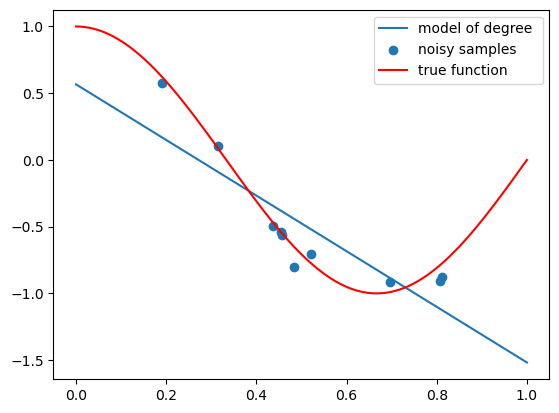

In [21]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [22]:
polynomial_features = PolynomialFeatures(degree=16, include_bias=False)
ridge_regression = Ridge(alpha=0)   # ← change to 1e-3, 1e-2, then 1 and re-run
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                           ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=2.54986e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=16, include_bias=False)),
                ('ridge_regression', Ridge(alpha=0))])

For plotting you can reuse the following code

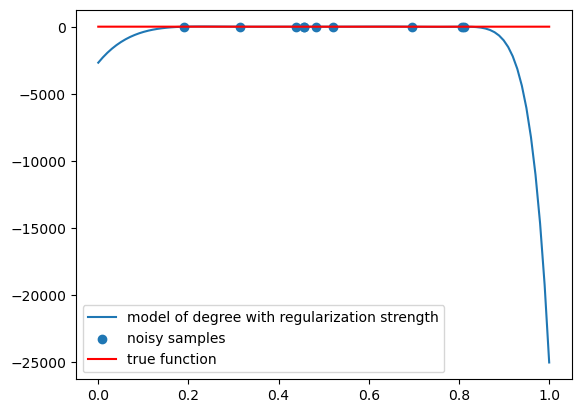

In [23]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

#### 2.16 What do you observe if you change the number of samples from the function?


With few samples (n=10) and high degree, the fit is unstable and oscillatory (high variance).

As n increases, the model becomes far more stable and tracks the true function better (variance drops).

Regularization further stabilizes the fit for small n and makes the result less sensitive to noise/outliers.
Takeaway: more data ↓variance; ridge helps especially in the small-n, high-degree regime.

#### 2.17 Why do we need a test set in machine learning?

To obtain an unbiased estimate of generalization error.
Training error is optimistic; validation is used for model selection; only the held-out test set tells you how well the final, tuned model is expected to perform on unseen data.

#### 2.18 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

No. Hyperparameters must be chosen using a validation set or cross-validation.
The test set is touched only once at the end to report final performance; using it for tuning leaks information and leads to overly optimistic estimates.